<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2006_3%20-%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
키워드: [차원 축소, 주성분 분석, 설명된 분산]
- 차원 축소: 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류이다.
             차원 축소는 저장 공간을 줄이고 시각화하기 쉬우며, 다른 알고리즘의 성능을 높일 수도 있다.
- 주성분 분석: 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 "방향(기울기)"을 찾는 방법이다.
               이런 방향을 주성분이라고 한다.
               원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다.
               일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다.
- 설명된 분산: 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것이다.
               사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.

핵심 패키지 및 함수: [PCA, n_components, components_, explained_variance_, explained_variance_ratio_, (inverse_)transform()]
- n_components: 주성분의 개수를 지정 (기본값은 None)
- components_: 훈련 세트에서 찾은 주성분이 저장됨
- explained_variance_: 설명된 분산이 저장됨
- explained_variance_ratio_: 설명된 분산의 비율이 저장됨
- trnasform(): 특성을 줄여줌(차원 축소)
- inverse_transform(): 차원을 축소시킨 데이터를 다시 원본으로 복원(literally inverse)
'''

'\n키워드: [차원 축소, 주성분 분석, 설명된 분산]\n- 차원 축소: 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류이다.\n             차원 축소는 저장 공간을 줄이고 시각화하기 쉬우며, 다른 알고리즘의 성능을 높일 수도 있다.\n- 주성분 분석: 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 "방향(기울기)"을 찾는 방법이다.\n               이런 방향을 주성분이라고 한다.\n               원본 데이터를 주성분에 투영하여 새로운 특성을 만들 수 있다.\n               일반적으로 주성분은 원본 데이터에 있는 특성 개수보다 작다.\n- 설명된 분산: 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한 것이다.\n               사이킷런의 PCA 클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행할 수 있다.\n\n핵심 패키지 및 함수: [PCA, n_components, components_, explained_variance_, explained_variance_ratio_, (inverse_)transform()]\n- n_components: 주성분의 개수를 지정 (기본값은 None)\n- components_: 훈련 세트에서 찾은 주성분이 저장됨\n- explained_variance_: 설명된 분산이 저장됨\n- explained_variance_ratio_: 설명된 분산의 비율이 저장됨\n- trnasform(): 특성을 줄여줌(차원 축소)\n- inverse_transform(): 차원을 축소시킨 데이터를 다시 원본으로 복원(literally inverse)\n'

In [ ]:
'''
현재 한빛 마켓은 k-평균 알고리즘으로 업로드된 사진을 클러스터로 분류하여 폴더별로 저장했다.
그런데 한 가지 문제가 발생했다.
너무 많은 사진이 등록되어 저장 공간이 부족하다는 것이다.
어떻게 하면 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까? (P)

사진을 3차원에서 2차원으로 줄이는 차원 축소를 하면 되지 않을까?
차원 축소가 해답이지만 여기서의 차원은 그런 차원이 아니다. (S)

지금까지 데이터가 가진 속성을 특성이라 불렀다.
과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈이다.
머신러닝에서는 이런 특성을 "차원(dimension)"이라고 부른다.
이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다.

(2차원 배열과 1차원 배열의 차원은 다른 걸까?)
- 2차원 배열과 1차원 배열(벡터)에서 차원이란 용어는 조금 다르게 사용한다.
  다차원 배열에서 차원은 배열의 축 개수가 된다.
  가령 2차원 배열일 때는 행과 열이 차원이 된다. (2개의 축)
  하지만 1차원 배열, 즉 벡터일 경우에는 원소의 개수를 말한다.
  ex) 5개의 원소를 가진 1차원 배열 --> 5차원 벡터

이를 위해 비지도 학습 작업 중 하나인 "차원 축소(dimensionality reduciton)" 알고리즘을 다루어 보겠다.
3장에서 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다.
차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고
지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원(예를 들어 과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이며 복원할 수도 있다.
이번 장에서는 대표적인 차원 축소 알고리즘인 "주성분 분석(principal compoenent analysis)"을 배우겠다.
주성분 분석을 간단히 "PCA"라고도 부른다.
'''

'\n현재 한빛 마켓은 k-평균 알고리즘으로 업로드된 사진을 클러스터로 분류하여 폴더별로 저장했다.\n그런데 한 가지 문제가 발생했다.\n너무 많은 사진이 등록되어 저장 공간이 부족하다는 것이다.\n어떻게 하면 군집이나 분류에 영향을 끼치지 않으면서 업로드된 사진의 용량을 줄일 수 있을까? (P)\n\n사진을 3차원에서 2차원으로 줄이는 차원 축소를 하면 되지 않을까?\n차원 축소가 해답이지만 여기서의 차원은 그런 차원이 아니다. (S)\n\n지금까지 데이터가 가진 속성을 특성이라 불렀다.\n과일 사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있는 셈이다.\n머신러닝에서는 이런 특성을 "차원(dimension)"이라고 부른다.\n이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있을 것이다.\n\n(2차원 배열과 1차원 배열의 차원은 다른 걸까?)\n- 2차원 배열과 1차원 배열(벡터)에서 차원이란 용어는 조금 다르게 사용한다.\n  다차원 배열에서 차원은 배열의 축 개수가 된다.\n  가령 2차원 배열일 때는 행과 열이 차원이 된다. (2개의 축)\n  하지만 1차원 배열, 즉 벡터일 경우에는 원소의 개수를 말한다.\n  ex) 5개의 원소를 가진 1차원 배열 --> 5차원 벡터\n\n이를 위해 비지도 학습 작업 중 하나인 "차원 축소(dimensionality reduciton)" 알고리즘을 다루어 보겠다.\n3장에서 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다는 것을 배웠다.\n차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 \n지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.\n\n또한 줄어든 차원에서 다시 원본 차원(예를 들어 과일 사진의 경우 10,000개의 차원)으로 손실을 최대한 줄이며 복원할 수도 있다.\n이번 장에서는 대표적인 차원 축소 알고리즘인 "주성분 분석(principal compoenent analysis)"을 배우겠다.\n주성분 분석을

In [ ]:
# 과일 데이터셋 다운로드
import urllib.request

# 데이터 URL 및 저장 경로
url = "https://bit.ly/fruits_300_data"
save_path = "fruits_300.npy"

try:
    # 데이터 다운로드
    urllib.request.urlretrieve(url, save_path)
    print(f"파일 다운로드 성공: {save_path}")
except Exception as e:
    print(f"파일 다운로드 실패: {e}")

파일 다운로드 성공: fruits_300.npy


In [ ]:
# 데이터셋 로드 및 넘파이 (2차원) 배열 변환
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
# PCA 클래스 사용
from sklearn.decomposition import PCA

pca = PCA(n_components=50) # 주성분의 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
# 주성분 배열의 크기 확인
print(pca.components_.shape) # PCA 클래스가 찾은 주성분은 components_ 속성에 저장됨

(50, 10000)


In [ ]:
'''
n_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50이다.
즉 50개의 주성분을 찾은 셈이다.
두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.

원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력해 볼 수 있다.
6-2 장에서 사용했던 draw_fruits() 함수를 사용해서 이 주성분을 그림으로 그려보자.
'''

'\nn_components=50으로 지정했기 때문에 pca.components_ 배열의 첫 번째 차원이 50이다.\n즉 50개의 주성분을 찾은 셈이다.\n두 번째 차원은 항상 원본 데이터의 특성 개수와 같은 10,000이다.\n\n원본 데이터와 차원이 같으므로 주성분을 100 x 100 크기의 이미지처럼 출력해 볼 수 있다.\n6-2 장에서 사용했던 draw_fruits() 함수를 사용해서 이 주성분을 그림으로 그려보자.\n'

In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수
  # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: # n개 까지만 그립니다.
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

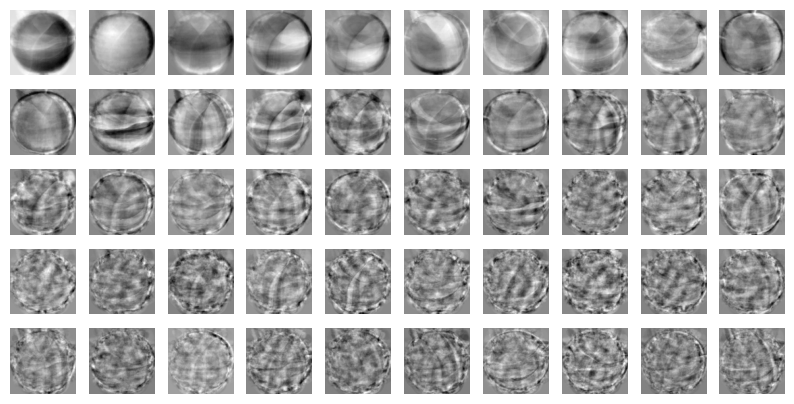

In [ ]:
# 주성분을 시각화하기
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
'''
이 주성분은 원본 데이터에서 가장 큰 분산이 큰 방향을 순서대로 나타낸 것이다.
한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.
PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여 보자.
'''

'\n이 주성분은 원본 데이터에서 가장 큰 분산이 큰 방향을 순서대로 나타낸 것이다.\n한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것처럼 생각할 수도 있다.\n\n주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.\nPCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여 보자.\n'

In [ ]:
# 원본 데이터 크기 확인
print(fruits_2d.shape)

(300, 10000)


In [ ]:
# 원본 데이터의 차원 축소
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

# 1,0000개의 특성을 50개의 특성으로 차원 축소

(300, 50)


In [ ]:
'''
데이터의 차원을 줄였다면 다시 원상 복구할 수도 있을까?
이를 알아보자.

앞에서 원본 데이터의 특성을 50개로 줄였다.
이로 인해 어느 정도 손실이 발생할 수밖에 없다.
하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.

PCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다.
앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원할 예정이다.
'''

'\n데이터의 차원을 줄였다면 다시 원상 복구할 수도 있을까?\n이를 알아보자.\n\n앞에서 원본 데이터의 특성을 50개로 줄였다.\n이로 인해 어느 정도 손실이 발생할 수밖에 없다.\n하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.\n\nPCA 클래스는 이를 위해 inverse_transform() 메서드를 제공한다.\n앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10,000개의 특성을 복원할 예정이다.\n'

In [ ]:
# 특성(차원) 복원
fruits_inverse = pca.inverse_transform(fruits_pca)

print(fruits_inverse.shape)

(300, 10000)


In [ ]:
'''
예상대로 10,000개의 특성이 복원되었다.
이제 이 데이터를 100 x 100 크기로 바꿔 100개씩 나누어 출력하겠다.
사과, 파인애플, 바나나 순서이다.
'''

'\n예상대로 10,000개의 특성이 복원되었다.\n이제 이 데이터를 100 x 100 크기로 바꿔 100개씩 나누어 출력하겠다.\n사과, 파인애플, 바나나 순서이다.\n'

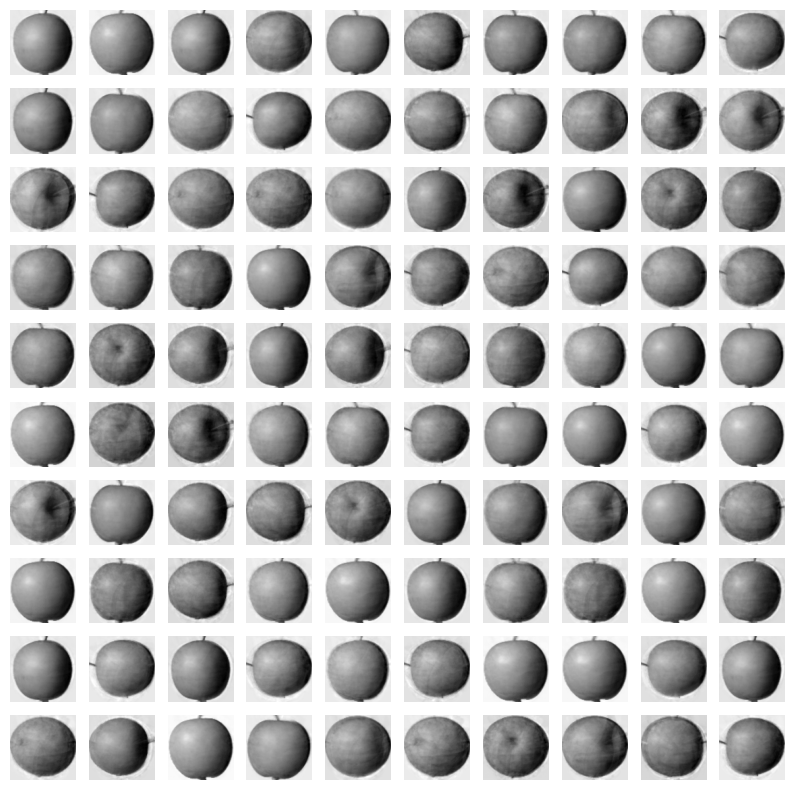

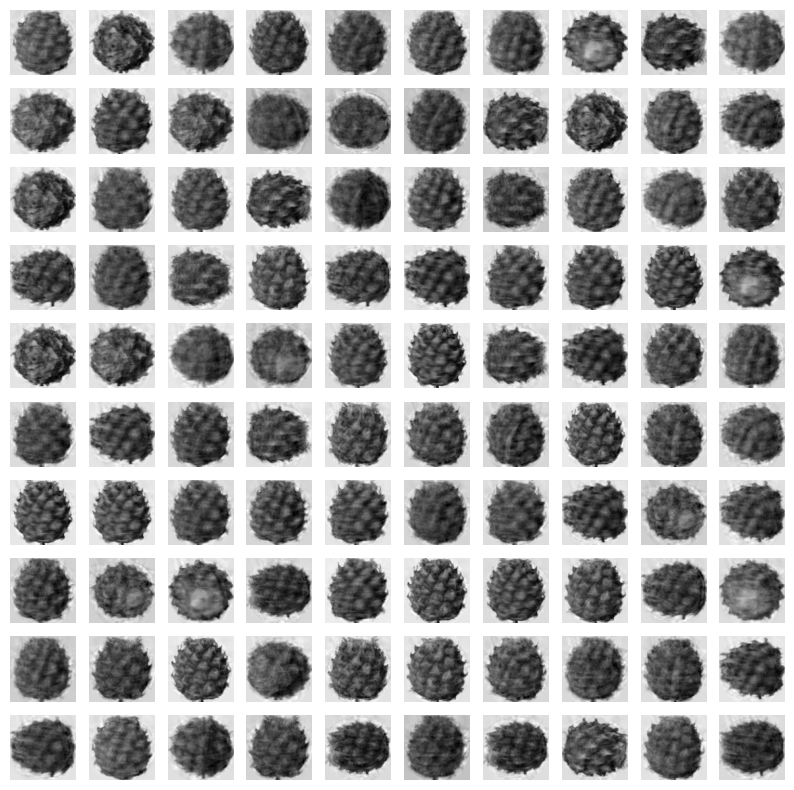

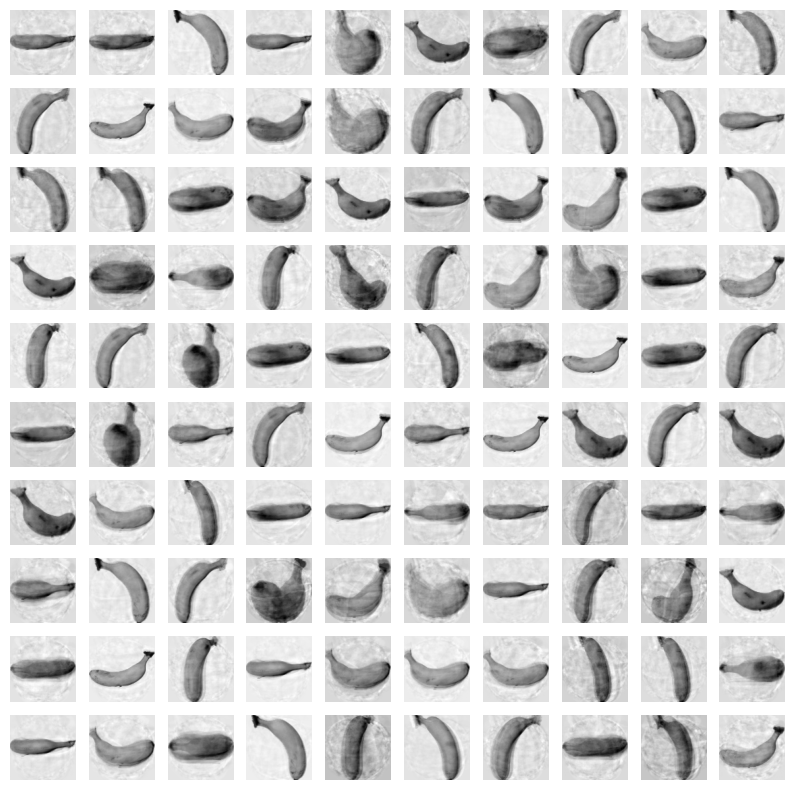

In [ ]:
# 100 x 100 크기로 변환 후 100개씩 나눠 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])

  print("\n")

In [ ]:
'''
거의 모든 과일이 잘 복원되었다.
일부 흐리고 번진 부분이 있지만 이는 놀라운 일이다.
이 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.

만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.
그럼 50개의 특성은 얼마나 분산을 보존하고 있는 것일까?
이를 알아보자.

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 "설명된 분산(explained variance)"이라고 한다.
PCA 클래스의 explained_variance_ratio_ 속성에 각 주성분의 설명된 분산 비율이 기록되어 있다.
당연히 첫 번째 주성분의 설명된 분산이 가장  크다.
이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.
'''

'\n거의 모든 과일이 잘 복원되었다.\n일부 흐리고 번진 부분이 있지만 이는 놀라운 일이다.\n이 50개의 특성이 분산을 가장 잘 보존하도록 변환된 것이기 때문이다.\n\n만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.\n그럼 50개의 특성은 얼마나 분산을 보존하고 있는 것일까?\n이를 알아보자.\n\n주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 "설명된 분산(explained variance)"이라고 한다.\nPCA 클래스의 explained_variance_ratio_ 속성에 각 주성분의 설명된 분산 비율이 기록되어 있다.\n당연히 첫 번째 주성분의 설명된 분산이 가장  크다.\n이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.\n'

In [ ]:
# 총 분산 비율 구하기
print(np.sum(pca.explained_variance_ratio_))

# 92%가 넘는 분산을 유지하고 있음을 확인 가능

0.9215418914838425


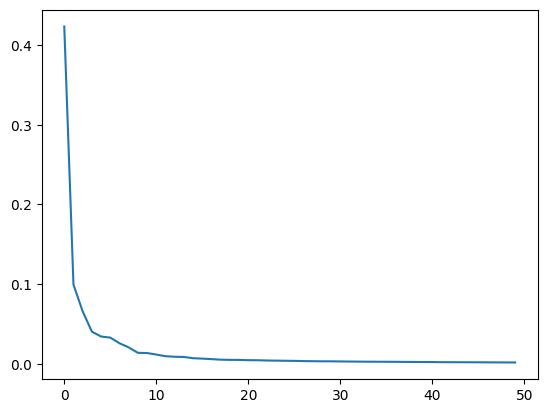

In [ ]:
# 설명된 분산의 비율을 시각화
plt.plot(pca.explained_variance_ratio_)

plt.show()

# 처음 10개의 주성분이 대부분의 분산을 표현하고 있음을 확인 가능

In [ ]:
# 이제 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 차이점을 알아 보자.

In [ ]:
# 3개의 과일 사진 분류를 위해 로지스틱 회귀 모델 생성
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
'''
지도 학습 모델을 사용하려면 타깃값(정답 데이터)이 있어야 한다.
여기서는 사과를 0, 파인애플을 1, 바나나를 2로 지정하겠다.
파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복하는데,
이를 이용하면 각각 100개의 타깃 데이터를 만들 수 있다.
'''

'\n지도 학습 모델을 사용하려면 타깃값(정답 데이터)이 있어야 한다.\n여기서는 사과를 0, 파인애플을 1, 바나나를 2로 지정하겠다.\n파이썬 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복하는데,\n이를 이용하면 각각 100개의 타깃 데이터를 만들 수 있다.\n'

In [ ]:
# 각각 100개의 타깃 데이터 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
# 원본 데이터(fruits_2d)의 교차 검증 수행을 통한 성능 검증
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.1820241928100585


In [ ]:
# 훈련 시간(fit_time)을 PCA로 축소한 데이터의 것과 비교
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.025223779678344726


In [ ]:
'''
50개의 특성만 사용했는데도 정확도가 약 100%이고 훈련 시간은 눈에 띄게 감소했다.
PCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.

앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다.
이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다.
PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.
설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 보겠다.
'''

'\n50개의 특성만 사용했는데도 정확도가 약 100%이고 훈련 시간은 눈에 띄게 감소했다.\nPCA로 훈련 데이터의 차원을 축소하면 저장 공간뿐만 아니라 머신러닝 모델의 훈련 속도도 높일 수 있다.\n\n앞서 PCA 클래스를 사용할 때 n_components 매개변수에 주성분의 개수를 지정했다.\n이 대신 원하는 설명된 분산의 비율을 입력할 수도 있다.\nPCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾는다.\n설명된 분산의 50%에 달하는 주성분을 찾도록 PCA 모델을 만들어 보겠다.\n'

In [ ]:
# 설명된 분산(50%)의 비율을 지정한 PCA 모델 생성
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

# n_components 매개변수에 주성분 개수 대신 0~1 사이의 비율을 실수로 입력하면 됨

PCA(n_components=0.5)

In [ ]:
# 찾은 주성분 개수 확인
print(pca.n_components_)

# 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있다는 의미임

2


In [ ]:
# PCA 모델로 원본 데이터를 변환
fruits_pca = pca.transform(fruits_2d)

print(fruits_pca.shape)

# 주성분이 2개이므로 변환된 데이터의 크기는 (300, 2)

(300, 2)


In [ ]:
# 교차 검증 결과의 성능 확인
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 99%의 점수(정확도)를 얻음

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9933333333333334
0.0792348861694336


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

print(np.unique(km.labels_, return_counts=True)) # km.labels_는 클러스터의 레이블을 저장함 (1차원 넘파이 배열)

# 클러스터는 각각 110개, 99개, 91개의 샘플을 포함하고 있음 (6-2장의 원본 데이터 사용 결과와 비슷함)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


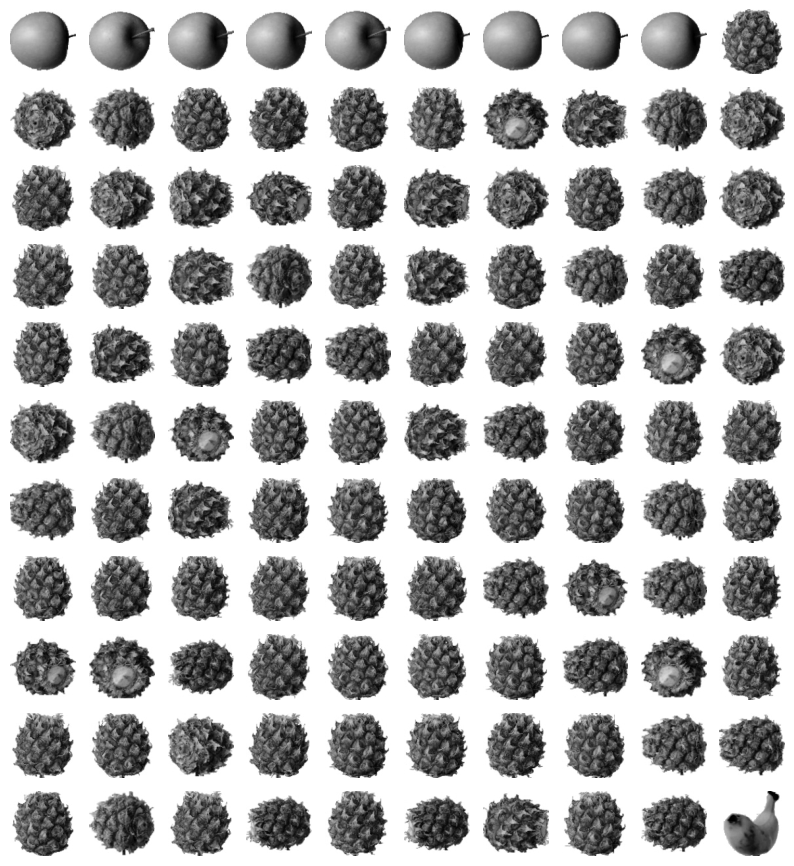

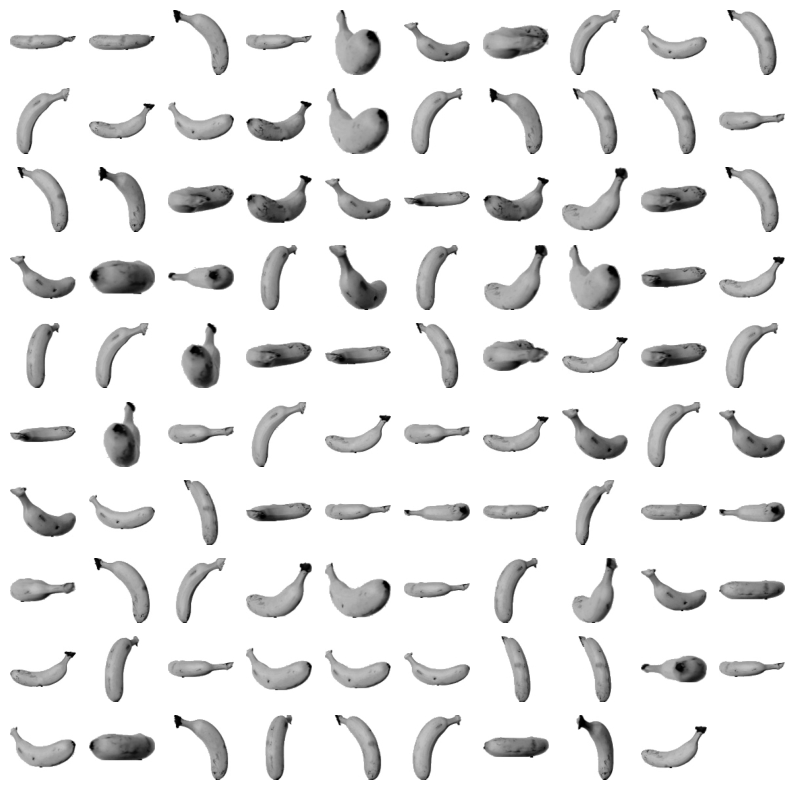

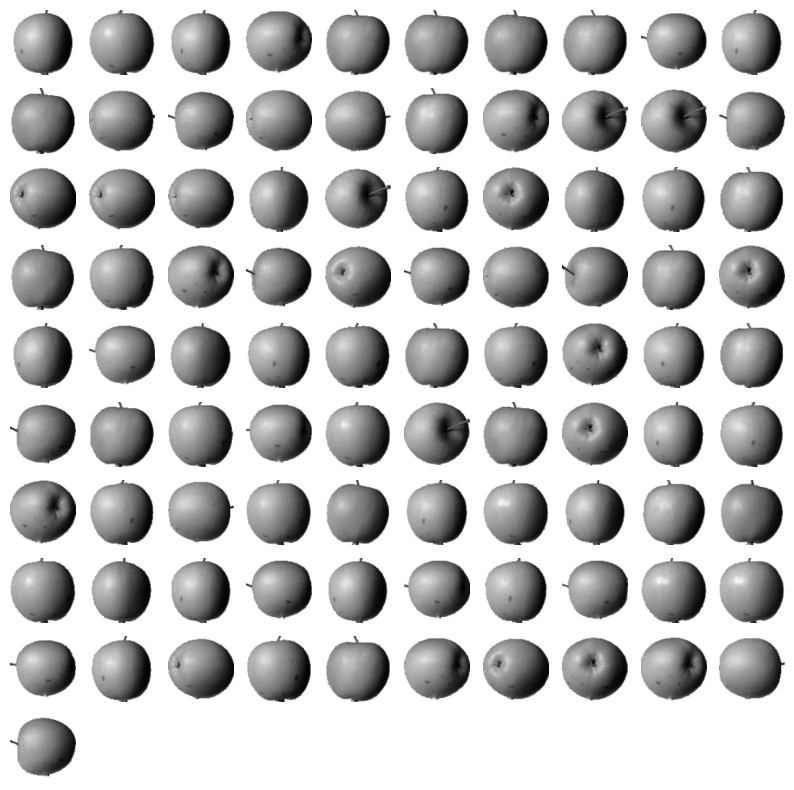

In [ ]:
# 과일(by KMenas) 이미지 출력
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])

  print("\n") # 줄바꿈 표시

# 출력 결과, 몇 개의 사과가 파인애플과 혼동되고 있음

In [ ]:
'''
훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다.
3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.
fruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 가능하다.
앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려보자.
'''

'\n훈련 데이터의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화이다.\n3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다.\nfruits_pca 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 가능하다.\n앞에서 찾은 km.labels_를 사용해 클러스터별로 나누어 산점도를 그려보자.\n'

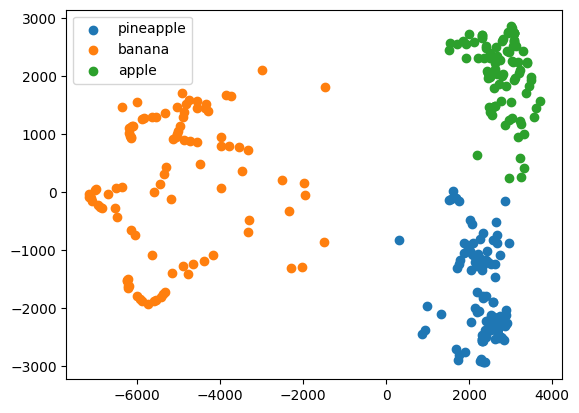

In [ ]:
# 클러스터별로 나눠 산점도 시각화
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])

plt.legend(['pineapple', 'banana', 'apple'])
plt.show()

In [ ]:
'''
각 클러스터의 산점도가 아주 잘 구분되었다.
2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 이유를 알 것 같다.

이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있다.
이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬워 보인다.
이처럼 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다.
그런 면에서 차원 축소는 매우 유용한 도구이다.

이제 본격적으로 다음 장부터 딥러닝에 대해 배울 예정이다.
매우 설레고 기대된다!
'''

'\n각 클러스터의 산점도가 아주 잘 구분되었다.\n2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증 점수가 99%에 달하는 이유를 알 것 같다.\n\n이 그림을 보면 사과와 파인애플 클러스터의 경계가 가깝게 붙어 있다.\n이 두 클러스터의 샘플은 몇 개가 혼동을 일으키기 쉬워 보인다.\n이처럼 데이터를 시각화하면 예상치 못한 통찰을 얻을 수 있다.\n그런 면에서 차원 축소는 매우 유용한 도구이다.\n\n이제 본격적으로 다음 장부터 딥러닝에 대해 배울 예정이다.\n매우 설레고 기대된다!\n'